# Objective

## Project - Advertisement Budget 

Infer relationship between sales and the three media budgets: TV, Radio and Newspaper.

### Project Steps Followed

1. Define Project Goals/Objective
2. Data Retrieval
3. Data Cleansing
4. Exploratory Data Analysis
5. Data Modeling
6. Result Analysis

### Project Objective

Suppose you have been assigned as Data Scientist to advice on how to improve the sales of a particular product of a company.

The company provided you with sales data from  different markets.

The data also contains the advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

The client cannot directly increase the sales of the product.

But they can adjust the advertisement budget for each of the three media. As a data scientist, if you can establish the relationship between advertisement expenditure and sales, you can provide your feedback on how to adjust the budgets so that sales can increase.

So, the objective is to develop a model that you can use to predict the sales on the basis of the three media budgets.

## Research Goals and Data

### Define Research Goals

Infer relationship between sales and three media budgets: TV, Radio, and Newspaper.

The dataset contains sales data from 200 markets

By the end of the project, the learners will be able to learn the approaches required for Multiple Linear Regression

## Import Libraries and Upload Data

In [52]:
import pandas as pd

In [53]:
import numpy as np

In [54]:
import matplotlib.pyplot as plt

In [55]:
import seaborn as sns 

In [56]:
advertising = pd.read_csv('Advertising.csv',usecols=[1,2,3,4])

## Understanding Data

he most important step of model development is understanding the dataset. Generally, we follow the following steps to understand the data:

1. View the raw data
2. Dimensions of the dataset
3. Data Types of the attributes
4. Presence of Null Values in the dataset
5. Statistical Analysis
6. Data Errors (zero values)

In [57]:
advertising.head() 

,TV,Radio,Newspaper,Sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [58]:
advertising.shape

(200, 4)

In [59]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Observations

NaN values do not present in the data set. Because of the Non-Null Count and number of rows in the dataset match.

There are 3 Input Variables and 1 Output Variable (Sales)

The data type of all the input variables is float64. The data type of out variable (Sales) is float64.

Shows that all the input as well as output variables are continuous (quantitative) data types.

None of the columns contain the Null Values

In [60]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Data Analysis

In [61]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [62]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


We can see that the min value of Radio is zero. We need to confirm how many zero values existing in the dataset.

In [63]:
(advertising == 0).sum(axis=0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

In [64]:
advertising.Sales.value_counts()

Sales
9.70     5
11.70    4
12.90    4
15.90    4
20.70    3
        ..
17.00    1
18.30    1
22.30    1
14.00    1
25.50    1
Name: count, Length: 121, dtype: int64

## Relationship - Predictor and Response

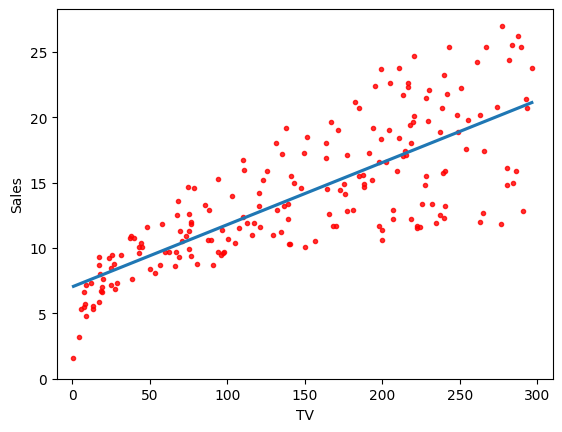

In [75]:
sns.regplot(x=advertising['TV'], y=advertising['Sales'], order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

order 1 for linear model
ci - confidence interval
scatter_kws Color - red size - 9

### Relationship between Sales and Radio

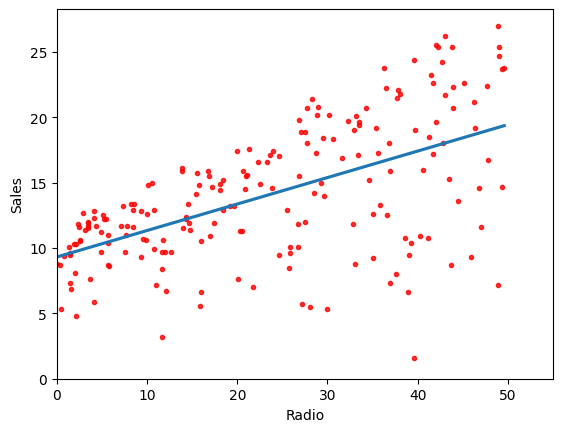

In [81]:
sns.regplot(x=advertising['Radio'], y=advertising['Sales'], order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0, 55)
plt.ylim(bottom=0)
plt.show()

### Relationship between Sales and Newspaper

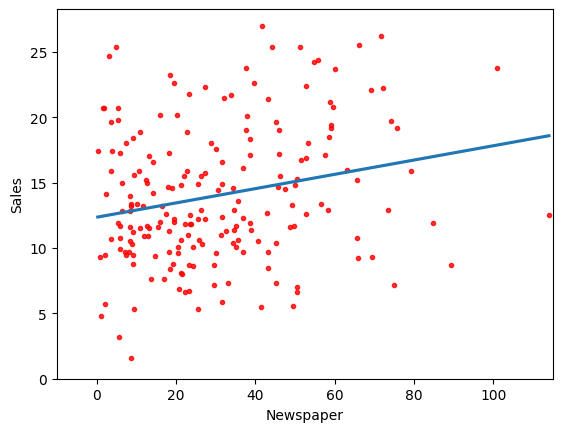

In [82]:
sns.regplot(x=advertising['Newspaper'], y=advertising['Sales'], order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,115)
plt.ylim(bottom=0)
plt.show()

## Data Normalization

In [96]:
from sklearn.preprocessing import scale

In [97]:
X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)

In [98]:
y = advertising.Sales

scale - standardize the data set along any axis
with_mean = True If True, center the data before scaling
with_std = If True, scale the data to unit variance
reshape (-1,1) one of new shape parameter as -1. It is an unknown dimension and we want

In [99]:
X[0:5]

array([[  83.0575],
       [-102.5425],
       [-129.8425],
       [   4.4575],
       [  33.7575]])

In [100]:
X.mean()

1.0089706847793422e-14

In [101]:
X.std()

85.63933175679269

## Linear Regression (Scaled Data)

In [102]:
import sklearn.linear_model as skl_lm

In [103]:
regr = skl_lm.LinearRegression()

In [106]:
regr.fit(X,y)

LinearRegression()

In [107]:
regr.intercept_

14.0225

In [108]:
regr.coef_

array([0.04753664])

### Calculate RSS

In [109]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)

In [110]:
min_rss

2102.5305831313512

### Linear Regression (Unscaled Data)

In [111]:
regr = skl_lm.LinearRegression()

In [112]:
X = advertising.TV.values.reshape(-1,1)

In [113]:
y = advertising.Sales

In [114]:
regr.fit(X,y)

LinearRegression()

In [115]:
regr.intercept_

7.032593549127695

In [116]:
regr.coef_

array([0.04753664])

## RSS

In [118]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)

In [119]:
min_rss

2102.5305831313512

## MSE

In [120]:
mse = min_rss/len(y)

In [121]:
mse

10.512652915656757

## R-Sq using Sklearn

In [122]:
from sklearn.metrics import mean_squared_error, r2_score

In [123]:
Sales_pred = regr.predict(X)

In [124]:
r2_score(y,Sales_pred)

0.611875050850071

## MSE using SKLearn

In [125]:
mean_squared_error(y, Sales_pred)

10.512652915656757

## Regression using Statsmodel

In [126]:
import statsmodels.formula.api as smf

In [127]:
est = smf.ols('Sales~ TV', advertising).fit()

In [128]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.47e-42
Time:                        23:21:31   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regression RSS and MSE

In [129]:
est.params

Intercept   7.03
TV          0.05
dtype: float64

## RSS

In [130]:
((advertising.Sales - (est.params[0] + est.params[1] * advertising.TV))** 2).sum()

2102.5305831313512

## MSE

In [131]:
((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))** 2).sum()/len(advertising.Sales)

10.512652915656757

## Single Linear Regression

### Linear Regression Sales and Radio

In [132]:
est = smf.ols('Sales ~ Radio', advertising).fit()

In [133]:
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


Check the p-value of Intercept and Radio.

It shows that there is a relationship between Sales and Radio

### Linear Regression Sales and Newspaper

In [134]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()

In [135]:
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


Check the p value of Intercept and Newspaper.

It shows that there is a relationship between Sales and Newspaper

## Multiple Linear Regression

Multiple Linear Regression

In a three-dimensional setting, with two predictors and one response, the least squares regression line becomes a plane. The plane is chosen to minimize the sum of the squared vertical distances between each observation (shown in red) and the plane.

In [137]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()

In [138]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.58e-96
Time:                        23:33:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Check the p value of TV, Radio and Newspaper.

## Correlation Matrix

In [139]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.78
Radio,0.05,1.00,0.35,0.58
Newspaper,0.06,0.35,1.00,0.23
Sales,0.78,0.58,0.23,1.00
